# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [56]:
# Load pickled data
import pickle
from sklearn.preprocessing import LabelBinarizer


training_file = r'../data/traffic-signs-data/train.p'
testing_file = r'../data/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [57]:
### Replace each question mark with the appropriate value.


n_train = X_train.shape[0]


n_test = X_test.shape[0]


image_shape = X_train[0].shape


n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
#print(X_train)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

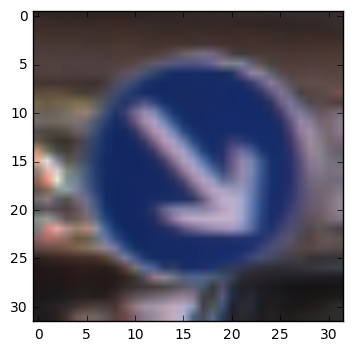

In [58]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
plt.imshow(X_test[2])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [59]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# normalize the images
import numpy as np
import cv2
# convert to greyscale
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
def norm(image_data):

    a = 0.01
    b = 0.9
    greyscale_min = 0
    greyscale_max = 255
    return a + ( ( (image_data - greyscale_min)*(b - a) )/( greyscale_max - greyscale_min ) )
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    
    a = 0.1
    b = 0.9
    out = a + ((image_data - image_data.min()) * (b-a)) / ((image_data.max() - image_data.min()))
    return out
# flatten each channel of image
# change output to one hot
def one_hot(input):
    num_input = len(input)
    max_value = max(input)
    out = np.zeros((num_input, max_value+1))
    out[np.arange(num_input), input] = 1
    return out

#X_train[1000] = norm_grey
#new_X_train = [normalize_grayscale(grayscale(x)).flatten() for x in X_train]
#new_X_test = [normalize_grayscale(grayscale(x)).flatten() for x in X_test]
new_X_train = norm(X_train)
new_X_test = norm(X_test)

encoder = LabelBinarizer()
encoder.fit(y_train)
new_y_train = encoder.transform(y_train)
new_y_test = encoder.transform(y_test)
#new_y_train = one_hot(y_train)
#new_y_test = one_hot(y_test)

#test = norm(X_train) # swap all to non flattened, non greyscale pics
#%matplotlib inline
#plt.imshow(X_train[5])
#plt.imshow(test[5])

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [31]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [63]:
new_X_train = new_X_train.reshape((-1, 3072))
new_X_test = new_X_test.reshape((-1, 3072))

# split training data into training/validation, 80% training, 20% validation
n_validation = 7841
X_validation = new_X_train[:7841]
y_validation = new_y_train[:7841]
new_X_train = new_X_train[7841:]
new_y_train = new_y_train[7841:]
#y_train = y_train[7]
#X_validation = new_X_train
#y_validation = new_y_train


In [19]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
batch_x, batch_y = mnist.train.next_batch(BATCH_SIZE)
print(batch_x)
print(batch_y)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0

In [50]:
batch_x, batch_y = mnist.train.next_batch(BATCH_SIZE)
#print(batch_x)
#print(batch_y)
def next_batch(batch_size, features, labels):
    start = 0
    last = 0
    while last < len(features):
        start = last
        last = start + batch_size
        yield features[start:last], labels[start:last]
batches = next_batch(BATCH_SIZE, new_X_train, new_y_train)
next_X, next_y = next(batches)

print(next_X[0])
print(next_y[0])


[ 0.34470588  0.33843137  0.36352941 ...,  0.41058824  0.40431373
  0.39490196]
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


In [61]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten
def conv2d(x, W, b, strides=1, pad_type='SAME'):
    # Conv2D wrapper, with bias and relu activation
    #F_W = tf.Variable(tf.truncated_normal(W, mean=0, stddev=0.01)) # (height, width, input_depth, output_depth)
    F_W = tf.Variable(tf.truncated_normal(W, stddev=0.1)) # (height, width, input_depth, output_depth)
    F_b = tf.Variable(tf.zeros(b)) # (output_depth)
    x = tf.nn.conv2d(x, F_W, strides=[1, strides, strides, 1], padding=pad_type)
    x = tf.nn.bias_add(x, F_b)
    return tf.nn.relu(x)

def maxpool(input, ksizes=2, stride=2, pad_type='VALID'):
    ksize = [1, ksizes, ksizes, 1]
    strides = [1, stride, stride, 1]
    return tf.nn.max_pool(input, ksize, strides, pad_type)

def fully_connected(input, output_size, biases):
    dim1 = input.get_shape().as_list()[-1]
    weights = tf.Variable(
    #tf.truncated_normal([dim1, output_size], mean=0, stddev=0.01))
    tf.truncated_normal([dim1, output_size], stddev=0.1))
    biases = tf.Variable(tf.zeros(biases))
    #return tf.nn.relu(tf.matmul(input, weights) + biases)
    return tf.matmul(input, weights) + biases
# LeNet architecture:
# INPUT -> CONV -> ACT -> POOL -> CONV -> ACT -> POOL -> FLATTEN -> FC -> ACT -> FC
#
def LeNet(x):
    # Reshape from 2D to 4D. This prepares the data for
    # convolutional and pooling layers.
    x = tf.reshape(x, (-1, 32, 32, 3))
    strides = {'conv1': 1, 'pool1': 2, 'conv2': 1, 'pool2': 1}
    # for conv layers, format is (filter_height, filter_width, input_depth, output_depth
    # for fully connected layers, format is output size
    weights = {'conv1': (5, 5, 3, 6), 'conv2': (5, 5, 6, 16), 'full1': 120, 'full2': 43}
    biases = {'conv1': 6, 'conv2': 16, 'full1': 120, 'full2': 43}
    paddings = {'conv1': 'VALID', 'pool1': 'VALID', 'conv2': 'VALID', 'pool2': 'VALID'}
    pool_filters = {'pool1': 2, 'pool2': 2}

    conv1_out = conv2d(x, weights['conv1'], biases['conv1'], strides=strides['conv1'], pad_type=paddings['conv1'])
    pool1_out = maxpool(conv1_out, ksizes=pool_filters['pool1'], stride=strides['pool1'], pad_type=paddings['pool1'])
    conv2_out = conv2d(pool1_out, weights['conv2'], biases['conv2'], strides=strides['conv2'], pad_type=paddings['conv2'])
    pool2_out = maxpool(conv2_out, ksizes=pool_filters['pool2'], stride=strides['pool2'], pad_type=paddings['pool2'])
    flat_out = flatten(pool2_out)
    full1_out = fully_connected(flat_out, weights['full1'],  biases['full1'])
    #full1_out = -np.amax(full1_out)
    full1_out = tf.nn.relu(full1_out)
    full2_out = fully_connected(full1_out, weights['full2'],  biases['full2'])
    #full2_out = -np.amax(full2_out)
    return full2_out


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [64]:
### Train your model here.
### Feel free to use as many code cells as needed.

EPOCHS = 10
BATCH_SIZE = 50

x = tf.placeholder(tf.float32, (None, image_shape[0] * image_shape[1] * image_shape[2]))
y = tf.placeholder(tf.float32, (None, n_classes))
fc2 = LeNet(x)

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=fc2, labels=y))
#loss_op = tf.reduce_mean(-tf.reduce_sum(y * tf.log(tf.clip_by_value(tf.nn.softmax(fc2),1e-10,1.0))))
#learning_rate = 0.001
#opt = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
opt = tf.train.AdamOptimizer()
train_op = opt.minimize(loss_op)
correct_prediction = tf.equal(tf.argmax(fc2, 1), tf.argmax(y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


def next_batch(batch_size, features, labels):
    start = 0
    last = 0
    while last < len(features):
        start = last
        last = start + batch_size
        yield features[start:last], labels[start:last]

def batches(batch_size, features, labels):

    outout_batches = []
    
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
        
    return outout_batches
def eval_data(features, labels):
    """
    Given a dataset as input returns the loss and accuracy.
    """

    steps_per_epoch = len(features) // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE
    total_acc, total_loss = 0, 0
    #batches = next_batch(BATCH_SIZE, features, labels)
    val_batches = batches(BATCH_SIZE, features, labels)
    for batch_x, batch_y in val_batches:
        loss, acc = sess.run([loss_op, accuracy_op], feed_dict={x: batch_x, y: batch_y})
        total_acc += (acc * len(batch_x))
        total_loss += (loss * len(batch_x))    
    #for step in range(steps_per_epoch):
    #    batch_x, batch_y = next(batches)
    #    loss, acc = sess.run([loss_op, accuracy_op], feed_dict={x: batch_x, y: batch_y})
    #    total_acc += (acc * len(batch_x))
    #    total_loss += (loss * len(batch_x))
    return total_loss/num_examples, total_acc/num_examples




#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    sess.run(tf.initialize_all_variables())
    steps_per_epoch = len(new_X_train) // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE
    #print("steps_per_epoch", steps_per_epoch)
    # Train model
    
    print("starting")
    for i in range(EPOCHS):
        print("epoch", i)
        train_batches = batches(BATCH_SIZE, new_X_train, new_y_train)
        for batch_x, batch_y in train_batches:
            loss = sess.run(train_op, feed_dict={x: batch_x, y: batch_y})
        #batches = next_batch(BATCH_SIZE, new_X_train, new_y_train)
        #for step in range(steps_per_epoch):
            #print("step", step)
        #    batch_x, batch_y = next(batches)
            #print("got batch")
        #    loss = sess.run(train_op, feed_dict={x: batch_x, y: batch_y})
            #print("got loss")

        val_loss, val_acc = eval_data(X_validation, y_validation)
        #print("got val_loss, val_acc")
        print("EPOCH {} ...".format(i+1))
        print("Validation loss = {:.3f}".format(val_loss))
        print("Validation accuracy = {:.3f}".format(val_acc))
        print()

    # Evaluate on the test data
    test_loss, test_acc = eval_data(new_X_test, new_y_test)
    print("Test loss = {:.3f}".format(test_loss))
    print("Test accuracy = {:.3f}".format(test_acc))

    #print out predictions, use .index(1.0) on one_hot
    for ind, img in enumerate(new_X_test):
        result = sess.run(fc2, feed_dict={x: [img]})
        print (list(result[0]).index(max(result[0])), list(new_y_test[ind]).index(1))

starting
epoch 0
EPOCH 1 ...
Validation loss = 4.063
Validation accuracy = 0.000

epoch 1
EPOCH 2 ...
Validation loss = 4.973
Validation accuracy = 0.000

epoch 2
EPOCH 3 ...
Validation loss = 6.135
Validation accuracy = 0.000

epoch 3
EPOCH 4 ...
Validation loss = 6.866
Validation accuracy = 0.000

epoch 4
EPOCH 5 ...
Validation loss = 8.588
Validation accuracy = 0.000

epoch 5
EPOCH 6 ...
Validation loss = 5.840
Validation accuracy = 0.000

epoch 6
EPOCH 7 ...
Validation loss = 6.622
Validation accuracy = 0.000

epoch 7
EPOCH 8 ...
Validation loss = 6.624
Validation accuracy = 0.000

epoch 8
EPOCH 9 ...
Validation loss = 6.948
Validation accuracy = 0.000

epoch 9
EPOCH 10 ...
Validation loss = 7.247
Validation accuracy = 0.000

Test loss = 4.961
Test accuracy = 0.055
38 16
38 1
38 38
38 33
38 11
38 38
38 18
38 12
38 25
38 35
38 12
38 7
38 23
38 7
38 4
38 9
38 21
38 20
38 27
38 38
38 4
38 33
38 9
38 3
38 1
38 11
38 13
38 10
38 9
38 11
38 5
38 17
38 34
38 23
38 2
38 17
38 3
38 12
38 16

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.